In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [36]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [30]:
    datasets = tf.keras.preprocessing.image_dataset_from_directory(
         "PlantVillage",
          shuffle = True,
          image_size = (IMAGE_SIZE,IMAGE_SIZE),
          batch_size = BATCH_SIZE
    
    
    )

Found 2152 files belonging to 3 classes.


In [31]:
class_names = datasets.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [32]:
len(datasets)

68

In [33]:
for image_batch, label_batch in datasets.take(1):
    print(image_batch.shape)
    print(image_batch[0])
    print(label_batch.numpy())
    

(32, 256, 256, 3)
tf.Tensor(
[[[143. 133. 132.]
  [133. 123. 122.]
  [125. 115. 114.]
  ...
  [147. 138. 141.]
  [153. 144. 147.]
  [156. 147. 150.]]

 [[129. 119. 118.]
  [132. 122. 121.]
  [142. 132. 131.]
  ...
  [151. 142. 145.]
  [156. 147. 150.]
  [157. 148. 151.]]

 [[148. 138. 137.]
  [138. 128. 127.]
  [129. 119. 118.]
  ...
  [156. 147. 150.]
  [157. 148. 151.]
  [152. 143. 146.]]

 ...

 [[137. 130. 137.]
  [160. 153. 160.]
  [151. 144. 151.]
  ...
  [185. 180. 186.]
  [181. 176. 182.]
  [177. 172. 178.]]

 [[142. 135. 142.]
  [147. 140. 147.]
  [139. 132. 139.]
  ...
  [173. 168. 174.]
  [172. 167. 173.]
  [169. 164. 170.]]

 [[147. 140. 147.]
  [129. 122. 129.]
  [184. 177. 184.]
  ...
  [174. 169. 175.]
  [177. 172. 178.]
  [177. 172. 178.]]], shape=(256, 256, 3), dtype=float32)
[1 0 2 1 1 0 2 0 1 1 0 0 2 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1]


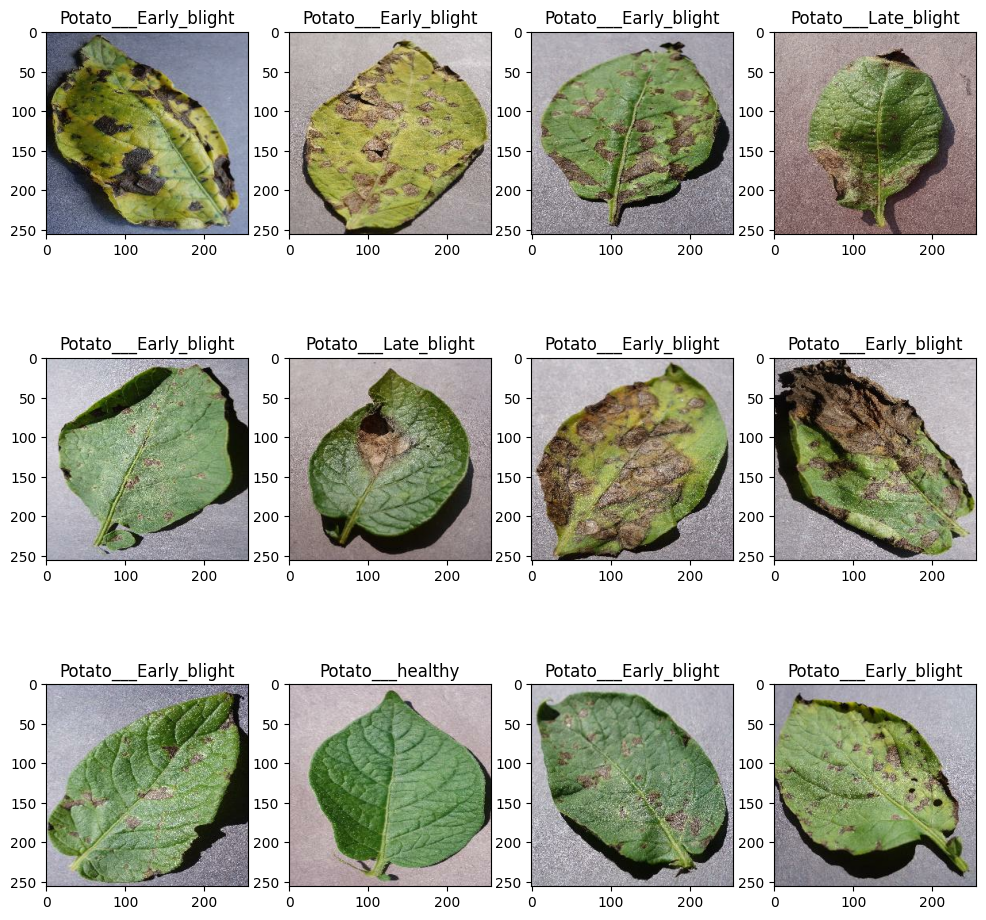

In [34]:
plt.figure(figsize =(12,12))
for image_batch, label_batch in datasets.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        

In [35]:
len(datasets)

68

In [38]:
train_size = 0.8
len(datasets)*train_size

54.400000000000006

In [40]:
#splitting the 80% data in training data
train_ds = datasets.take(54)
len(train_ds)

54

In [42]:
#Rest 20% data is used as a test datasets
test_ds = datasets.skip(54)
len(test_ds)

14

In [45]:
val_size = 0.1
val_ds = test_ds.take(6)
len(val_ds)

6

In [46]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [47]:
def get_dataset_partition_tf(datasets,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(datasets)
    
    if shuffle:
        datasets = datasets.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = datasets.take(train_size)
    
    val_ds = datasets.skip(train_size).take(val_size)
    test_ds = datasets.skip(train_size).skip(val_size)
    return train_ds , val_ds, test_ds   

In [50]:
 train_ds , val_ds,test_ds = get_dataset_partition_tf(datasets)

In [53]:
len(train_ds)



54

In [54]:
len(val_ds)

6

In [55]:
len(test_ds)

8

In [58]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
#Preprocessing the images 
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [64]:
#data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0,2),
])

NotImplementedError: Unknown `fill_mode` 2. Expected of one ('reflect', 'wrap', 'constant', 'nearest').